# forcing gamma function fits

Ideally, distributions will start at x,y = 0,0. This doesn't happen unless you force `loc=0`.

I believe this is the correct approach since I end up with the mean value calculated via both `np.mean()` and `mean_gamma = a*b` closer. Anyway, even if it's not exactly the right way to think about it, it's arguably gonna be good enough and will make for cleaner graphs :P

On first pass I noticed this looks somewhat different than it did for QBs but it looks tight for RBs and WRs

In [167]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

import lombardi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
# get data
x = np.linspace(0, 300, 1000)
data = lombardi.data.player_metric('Eddie Lacy', 'rushing_yds')

In [183]:
# remove zero values
data_pos = [a for a in data if a > 0]

# get kde, remove zero vals, and normalize
x, y_kde = lombardi.stats.fit_kde(x, data_pos, normalize=False)
y_kde_pos = [a for a in y_kde if a > 0]
y_kde_norm = [a/sum(y_kde_pos) for a in y_kde_pos]

# fit to gamma normally
c = scipy.stats.rv_discrete(name='custom', values=(x,y_kde_norm))
data_kde = c.rvs(size=len(x))
a,l,b = scipy.stats.gamma.fit(data_kde)

# print gamma params
mean = a*b
var = a*pow(b,2)
print a, l, b, mean, var

# fit and force loc=0
a,l,b = scipy.stats.gamma.fit([a for a in data_kde if a>0], floc=0)

mean = a*b
var = a*pow(b,2)
print a, l, b, mean, var

print np.mean(data_pos)
print np.var(data_pos)

rv = scipy.stats.gamma(a,l,b)
y_gamma_pos = rv.pdf(x)

14.5781699487 -83.2382354738 10.6269754218 154.92185374 1646.350732
2.21139750722 0 32.6076802014 72.1085427136 2351.29230059
66.847826087
1470.2594518


In [184]:
# get kde, remove zero vals, and normalize
x, y_kde = lombardi.stats.fit_kde(x, data, normalize=False)
y_kde_norm = [a/sum(y_kde) for a in y_kde]

# fit to gamma normally
c = scipy.stats.rv_discrete(name='custom', values=(x,y_kde_norm))
data_kde = c.rvs(size=len(x))
a,l,b = scipy.stats.gamma.fit(data_kde)

mean = a*b
var = a*pow(b,2)
print a, l, b, mean, var

print np.mean(data)
print np.var(data)

rv = scipy.stats.gamma(a,l,b)
y_gamma = rv.pdf(x)

10.260351624 -58.1724321631 12.4911345922 128.163433099 1600.90669264
66.847826087
1470.2594518


[41, 10, 99, 120, 82, 94, 150, 73, 27, 110, 16, 65, 141, 84, 66, 34, 43, 36, 48, 105, 40, 63, 59, 50, 69, 125, 98, 73, 97, 99, 100, 85, 9, 46, 90, 27, 3, 38, 10, 100, 105, 4, 124, 23, 60, 34]


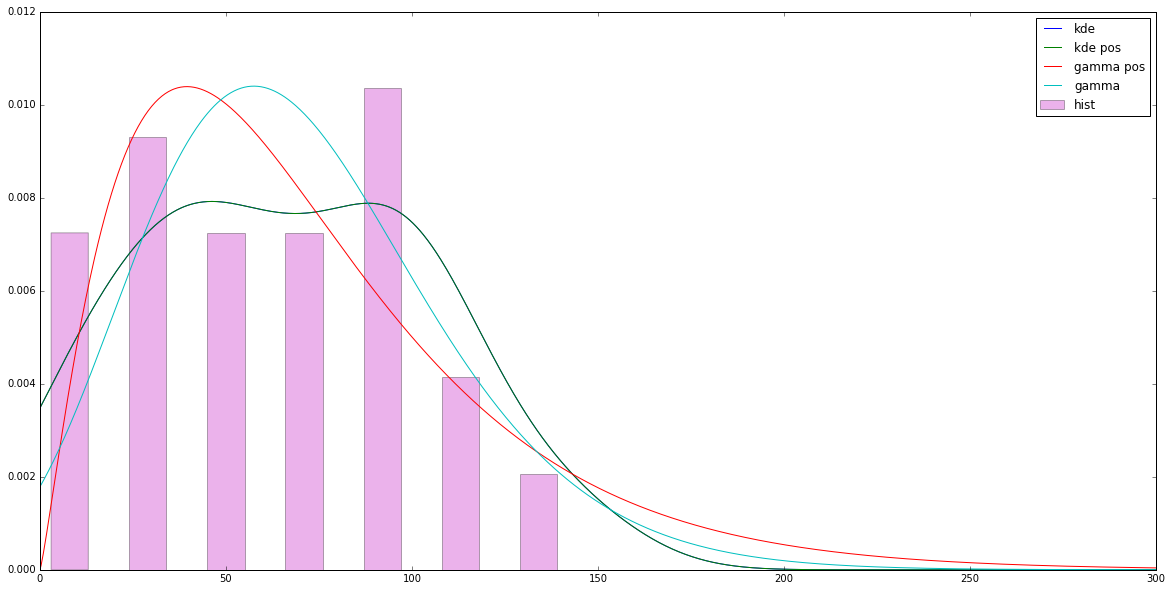

In [186]:
bin_size = 20

print data

plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([0, 300])
plt.plot(x, y_kde, label='kde')
plt.plot(x, y_kde_pos, label='kde pos')
plt.plot(x, y_gamma_pos, label='gamma pos')

plt.plot(x, y_gamma, label='gamma')
plt.hist(
    data_pos,
    normed=True,
    bins=lombardi.stats.num_bins(data_pos, bin_size),
    label='hist',
    alpha=0.3,
    width=float(bin_size)/2,
    align='mid',
)

plt.legend()


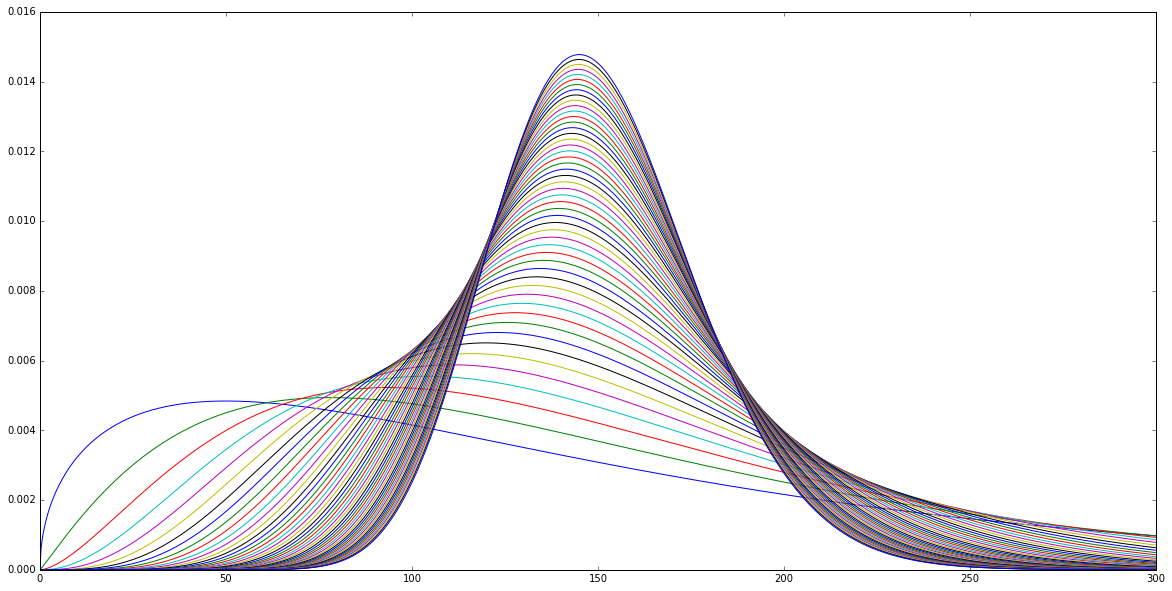

In [169]:
plt.figure(figsize=(20,10))
for i in np.linspace(1.5, 30, 50):
    y = scipy.stats.gamma(i, 0, 150/i).pdf(x)
    plt.plot(x,y)

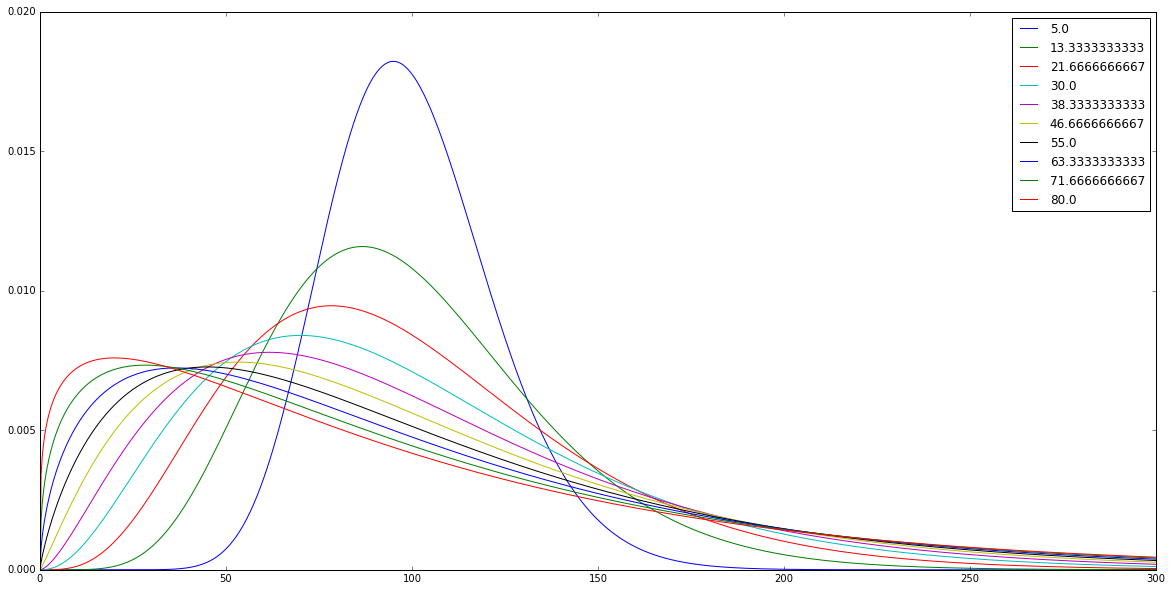

In [79]:
plt.figure(figsize=(20,10))
for i in np.linspace(5, 80, 10):
    y = scipy.stats.gamma(100/i, 0, i).pdf(x)
    plt.plot(x,y, label=i)
plt.legend()